# 타이타닉 데이터 전처리 및 분석

타이타닉 데이터셋을 활용한 머신러닝 분석을 위한 데이터 전처리 과정입니다.


## 1. 라이브러리 Import


In [18]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 

from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier # 중요도 파악 
from sklearn.preprocessing import StandardScaler 

import os # 파일이나 폴더경로를 정확하기 지정하려고


## 2. 데이터 로드 및 기본 탐색


In [19]:
# 현재 작업 디렉토리 확인
print("현재 작업 디렉토리:", os.getcwd())

# 프로젝트 루트로 경로 설정
import sys
project_root = os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd()))))
print("프로젝트 루트:", project_root)

# 절대 경로로 데이터 파일 경로 설정
train_path = os.path.join(project_root, "07_Machine_Deep_Learning", "data", "csv", "train.csv")
test_path = os.path.join(project_root, "07_Machine_Deep_Learning", "data", "csv", "test.csv")

print("Train 파일 경로:", train_path)
print("Test 파일 경로:", test_path)
print("Train 파일 존재 여부:", os.path.exists(train_path))
print("Test 파일 존재 여부:", os.path.exists(test_path))

# 파일이 존재하면 데이터 로드
if os.path.exists(train_path) and os.path.exists(test_path):
    train = pd.read_csv(train_path)
    test = pd.read_csv(test_path)
    print("\n✅ 데이터 로드 성공!")
    print("Train dataset shape:", train.shape)
    print("Test dataset shape:", test.shape)
    print("\nTrain dataset head:")
    print(train.head())
else:
    print("❌ 파일을 찾을 수 없습니다. 경로를 확인해주세요.")


현재 작업 디렉토리: c:\Users\ryan9\문서\GitHub\SeSac-AI-Developer-Notes-2025\07_Machine_Deep_Learning\ipynb\ML\0714
프로젝트 루트: c:\Users\ryan9\문서\GitHub\SeSac-AI-Developer-Notes-2025
Train 파일 경로: c:\Users\ryan9\문서\GitHub\SeSac-AI-Developer-Notes-2025\07_Machine_Deep_Learning\data\csv\train.csv
Test 파일 경로: c:\Users\ryan9\문서\GitHub\SeSac-AI-Developer-Notes-2025\07_Machine_Deep_Learning\data\csv\test.csv
Train 파일 존재 여부: True
Test 파일 존재 여부: True

✅ 데이터 로드 성공!
Train dataset shape: (891, 12)
Test dataset shape: (418, 11)

Train dataset head:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                      

## 3. 불필요한 열 삭제


In [20]:
# Cabin은 결측치가 너무 많아서 제거
train = train.drop(columns=['PassengerId', 'Name','SibSp','Parch', 'Cabin'])
test  = test.drop(columns=['PassengerId', 'Name','SibSp','Parch', 'Cabin'])
print(train.head())
print(train.shape)  # 특성 4개 삭제됨


   Survived  Pclass     Sex   Age            Ticket     Fare Embarked
0         0       3    male  22.0         A/5 21171   7.2500        S
1         1       1  female  38.0          PC 17599  71.2833        C
2         1       3  female  26.0  STON/O2. 3101282   7.9250        S
3         1       1  female  35.0            113803  53.1000        S
4         0       3    male  35.0            373450   8.0500        S
(891, 7)


## 4. 결측치 처리


In [21]:
# 결측치 확인하기
print(train.isna().sum())  # 각 특성별로 NaN개수가 출력된다.
print(train.info())
print(train.describe())  # 평균값이 나을지 중간값이 나을지를 지정하기 위해서


Survived      0
Pclass        0
Sex           0
Age         177
Ticket        0
Fare          0
Embarked      2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   Ticket    891 non-null    object 
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 48.9+ KB
None
         Survived      Pclass         Age        Fare
count  891.000000  891.000000  714.000000  891.000000
mean     0.383838    2.308642   29.699118   32.204208
std      0.486592    0.836071   14.526497   49.693429
min      0.000000    1.000000    0.420000    0.000000
25%      0.000000    2.000000   20.125000    7.910400
50%      0.000000    3.00000

In [22]:
# Age 결측치를 평균값으로 대체 (FutureWarning 해결)
age_mean = train["Age"].mean() 
print(f"Age 평균값: {age_mean:.2f}")

# pandas 3.0 호환성을 위해 수정된 방법 사용
train['Age'] = train['Age'].fillna(age_mean)
test['Age'] = test['Age'].fillna(age_mean)

print(f"Age 결측치 처리 후 - Train: {train['Age'].isna().sum()}개")
print(f"Age 결측치 처리 후 - Test: {test['Age'].isna().sum()}개")
print("\n=== Train dataset 결측치 현황 ===")
print(train.isna().sum()) 
print("\n=== Test dataset 결측치 현황 ===")
print(test.isna().sum())


Age 평균값: 29.70
Age 결측치 처리 후 - Train: 0개
Age 결측치 처리 후 - Test: 0개

=== Train dataset 결측치 현황 ===
Survived    0
Pclass      0
Sex         0
Age         0
Ticket      0
Fare        0
Embarked    2
dtype: int64

=== Test dataset 결측치 현황 ===
Pclass      0
Sex         0
Age         0
Ticket      0
Fare        1
Embarked    0
dtype: int64


In [23]:
# Test 데이터의 Fare 결측치 처리 (Train 데이터의 평균값으로 대체)
if test['Fare'].isna().sum() > 0:
    fare_mean = train['Fare'].mean()
    print(f"Test 데이터 Fare 결측치: {test['Fare'].isna().sum()}개")
    print(f"Fare 평균값으로 대체: {fare_mean:.2f}")
    test['Fare'] = test['Fare'].fillna(fare_mean)
    print(f"Fare 결측치 처리 후: {test['Fare'].isna().sum()}개")
else:
    print("Test 데이터에 Fare 결측치가 없습니다.")


Test 데이터 Fare 결측치: 1개
Fare 평균값으로 대체: 32.20
Fare 결측치 처리 후: 0개


In [24]:
# Embarked는 행을 삭제시키자
train = train.dropna(axis=0, how='any') 
# 행중에 한 컬럼이라도 NaN값이 있으면 전체행을 삭제시켜라 
test = test.dropna(axis=0, how='any')


## 5. 이상치 제거


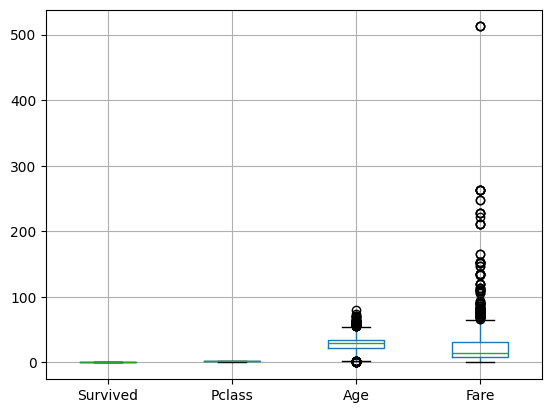

In [25]:
# boxplot을 그려보자 - 이상치 확인용
train.boxplot()  # 데이터프레임이 내부적으로 몇개의 차트는 가지고 있다
plt.show()  # 이상치를 확인하기 위해 boxplot를 그려보자


In [26]:
# 이상치 처리를 위한 IQR 함수 정의
def outfliers_iqr(data):
    q1, q3 = np.percentile(data, [25, 75])  # percentile은 값 2개를 넘겨받을 수 있다
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    
    return lower_bound, upper_bound  # tuple형태로 두 값을 반환


In [27]:
# Fare, Age 필드에서 이상치 처리 (pandas 3.0 호환성 개선)
for column in ['Fare', 'Age']:
    # Train 데이터 이상치 처리
    lower, upper = outfliers_iqr(train[column])
    print(f"{column} - Lower bound: {lower:.2f}, Upper bound: {upper:.2f}")
    
    # 이상치를 경계값으로 대체 (FutureWarning 방지)
    train[column] = train[column].clip(lower=lower, upper=upper)
    
    # Test 데이터 이상치 처리 (동일한 경계값 사용)
    test[column] = test[column].clip(lower=lower, upper=upper)
    
    print(f"{column} 이상치 처리 완료\n")


Fare - Lower bound: -26.76, Upper bound: 65.66
Fare 이상치 처리 완료

Age - Lower bound: 2.50, Upper bound: 54.50
Age 이상치 처리 완료



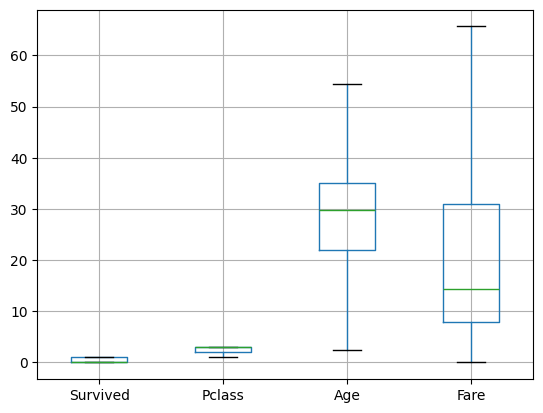

In [28]:
# 이상치 처리 후 다시 boxplot 확인
train.boxplot()  
plt.show()


## 6. 전처리 결과 확인


In [29]:
# ===== 최종 전처리 결과 확인 =====
print("🎯 데이터 전처리 완료!\n")

print("📊 데이터셋 크기:")
print(f"  • Train dataset: {train.shape}")
print(f"  • Test dataset: {test.shape}")

print("\n🔍 결측치 확인:")
train_missing = train.isna().sum()
test_missing = test.isna().sum()

print("  [Train dataset]")
for col in train_missing.index:
    missing_count = train_missing[col]
    if missing_count > 0:
        print(f"    ❌ {col}: {missing_count}개")
    else:
        print(f"    ✅ {col}: {missing_count}개")

print("\n  [Test dataset]")
for col in test_missing.index:
    missing_count = test_missing[col]
    if missing_count > 0:
        print(f"    ❌ {col}: {missing_count}개")
    else:
        print(f"    ✅ {col}: {missing_count}개")

print("\n📈 데이터 타입 및 메모리 사용량:")
print(train.info())

print("\n📉 수치형 데이터 요약 통계:")
print(train.describe())


🎯 데이터 전처리 완료!

📊 데이터셋 크기:
  • Train dataset: (889, 7)
  • Test dataset: (418, 6)

🔍 결측치 확인:
  [Train dataset]
    ✅ Survived: 0개
    ✅ Pclass: 0개
    ✅ Sex: 0개
    ✅ Age: 0개
    ✅ Ticket: 0개
    ✅ Fare: 0개
    ✅ Embarked: 0개

  [Test dataset]
    ✅ Pclass: 0개
    ✅ Sex: 0개
    ✅ Age: 0개
    ✅ Ticket: 0개
    ✅ Fare: 0개
    ✅ Embarked: 0개

📈 데이터 타입 및 메모리 사용량:
<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   Ticket    889 non-null    object 
 5   Fare      889 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 55.6+ KB
None

📉 수치형 데이터 요약 통계:
         Survived      Pclass         Age        Fare
count  889.000000  889.000000  889.000000  889.000